In [284]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm
from IPython.display import Image
from IPython.display import display, Math, Latex
from sklearn.naive_bayes import GaussianNB
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score,recall_score
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [285]:
def label_encoding(dataset,input_headers):
    
    for i in input_headers:
        the_data_type=dataset[i].dtype.name
#         if (the_data_type=='object'):
        lable_enc=preprocessing.LabelEncoder()
        lable_enc.fit(dataset[i])
        labels=lable_enc.classes_   #this is an array
        labels=list(labels) #converting the labels array to a list
        print(labels)
        dataset[i]=lable_enc.transform(dataset[i])
#             print(dataset[i])


In [286]:
def feature_scaling(X_train,X_test):
    sc_X=StandardScaler()
    X_train=sc_X.fit_transform(X=X_train,y=None)
    X_test=sc_X.fit_transform(X=X_test,y=None)

    print(sc_X.fit(X_train))
    print(X_train[0:5])
    
    return X_train, X_test

In [287]:

df=pd.read_csv('thermostat_dataset.txt',delimiter='\t')

In [288]:
df


,OT,TOD,DW,SP
0,37,2,3,80
1,62,12,2,68
2,57,2,1,76
3,100,10,2,72
4,85,2,1,72
5,63,6,3,72
6,35,12,2,68
7,75,23,6,72
8,84,9,7,72
9,71,8,3,68


In [289]:
df.describe()

,OT,TOD,DW,SP
count,40.000000,40.000000,40.000000,40.000000
mean,64.950000,12.150000,3.825000,73.100000
std,20.452509,6.616026,2.049234,4.049691
min,32.000000,1.000000,1.000000,68.000000
25%,48.500000,8.000000,2.000000,72.000000
50%,62.000000,12.000000,3.000000,72.000000
75%,84.000000,16.250000,5.250000,76.000000
max,100.000000,24.000000,7.000000,80.000000


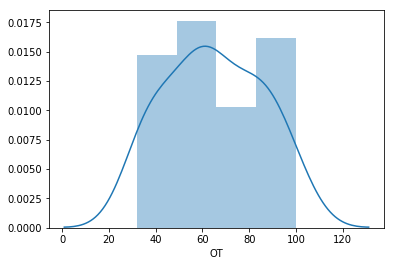

In [290]:
sns.distplot(df.OT)
plt.show()

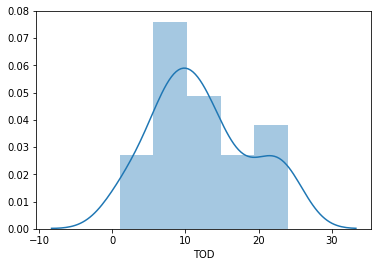

In [291]:
sns.distplot(df.TOD)
plt.show()

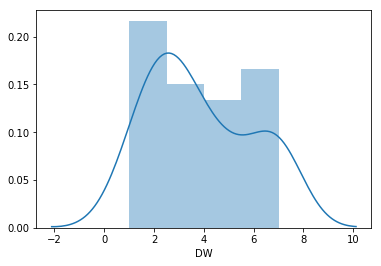

In [292]:
sns.distplot(df.DW)
plt.show()

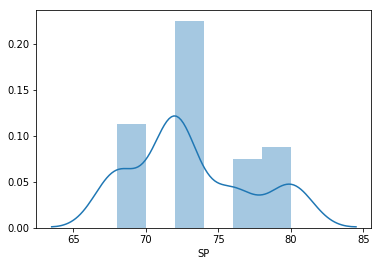

In [293]:
sns.distplot(df.SP)
plt.show()

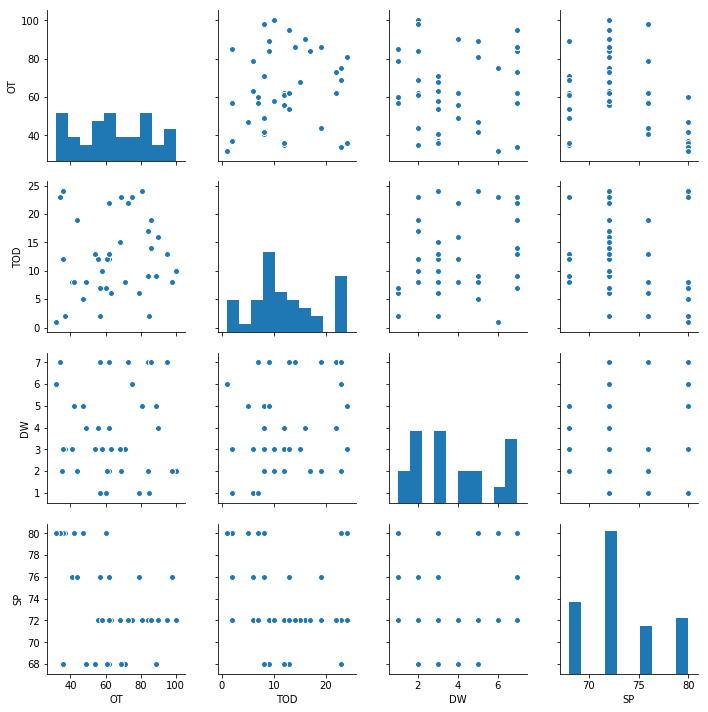

In [294]:
sns.pairplot(df)
plt.show()

In [295]:
X=df.drop('SP',axis=1)

In [296]:
X.head()

,OT,TOD,DW
0,37,2,3
1,62,12,2
2,57,2,1
3,100,10,2
4,85,2,1


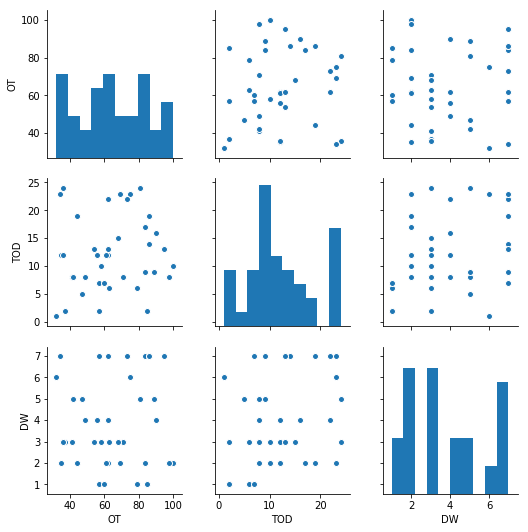

In [297]:
sns.pairplot(X)
plt.show()

In [298]:
y=df['SP']

In [299]:
y.head()

0    80
1    68
2    76
3    72
4    72
Name: SP, dtype: int64

In [300]:
label_encoding(df,['SP'])

[68, 72, 76, 80]


In [301]:
y

0     3
1     0
2     2
3     1
4     1
5     1
6     0
7     1
8     1
9     0
10    2
11    1
12    2
13    0
14    1
15    0
16    1
17    2
18    1
19    3
20    0
21    1
22    1
23    1
24    1
25    0
26    1
27    1
28    1
29    2
30    0
31    1
32    3
33    1
34    0
35    3
36    3
37    2
38    3
39    3
Name: SP, dtype: int64

In [302]:
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y)

In [303]:
Xtrain

,OT,TOD,DW
31,68,15,3
18,90,16,4
29,98,8,2
0,37,2,3
15,36,12,3
10,41,8,3
11,86,19,7
22,56,12,4
39,47,5,5
25,54,13,3


In [304]:
Xtest

,OT,TOD,DW
20,89,9,5
1,62,12,2
3,100,10,2
30,49,8,4
8,84,9,7
17,79,6,1
6,35,12,2
38,32,1,6
19,42,8,5
28,95,13,7


In [305]:
#Scale the data    
Xtrain, Xtest=feature_scaling(Xtrain,Xtest)

StandardScaler(copy=True, with_mean=True, with_std=True)
[[ 0.19645891  0.24950453 -0.36997004]
 [ 1.38602663  0.39344945  0.13453456]
 [ 1.81859671 -0.75810991 -0.87447463]
 [-1.47975015 -1.62177943 -0.36997004]
 [-1.53382141 -0.18233023 -0.36997004]]


In [306]:
ytest

20    0
1     0
3     1
30    0
8     1
17    2
6     0
38    3
19    3
28    1
Name: SP, dtype: int64

In [307]:
model = GaussianNB()

In [308]:
model.fit(Xtrain,ytrain)

GaussianNB(priors=None)

In [309]:
y_model=model.predict(Xtest)
y_model

array([1, 0, 1, 3, 1, 1, 3, 3, 3, 1], dtype=int64)

In [310]:
accuracy_score(ytest,y_model)

0.59999999999999998

In [312]:
tn,fp,fn,tp=confusion_matrix(ytest, y_model)

In [313]:
tn

array([1, 1, 0, 2], dtype=int64)

In [314]:
fp

array([0, 3, 0, 0], dtype=int64)

In [315]:
fn

array([0, 1, 0, 0], dtype=int64)

In [316]:
tp

array([0, 0, 0, 2], dtype=int64)

In [317]:
confusion_matrix(ytest, y_model)

array([[1, 1, 0, 2],
       [0, 3, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 2]], dtype=int64)